In [1]:
%matplotlib inline

In [8]:
from challenge_problem1 import generate_mock, rband_dict1, gband_dict1

source_galaxies = generate_mock()

#  Define the source and target model parameters
rband_dict_source = dict(gamma_1=3.273, log_L_0=9.935, log_M_1=11.07, gamma_2=0.255)
rband_dict_target = dict(gamma_1=3.073, log_L_0=9.635, log_M_1=11.27, gamma_2=0.285)

gband_dict_source = dict(gamma_1=2.85, log_L_0=9.4, log_M_1=10.7, gamma_2=0.55)
gband_dict_target = dict(gamma_1=3.00, log_L_0=9.5, log_M_1=10.5, gamma_2=0.45)

source_galaxies = generate_mock(rband_dict=rband_dict_source, 
                               gband_dict=gband_dict_source)
target_galaxies = generate_mock(rband_dict=rband_dict_target, 
                               gband_dict=gband_dict_target)


In [9]:
from scipy.stats import binned_statistic
logm_bins = np.linspace(10, 15.5, 50)
logm_mids = 0.5*(logm_bins[:-1] + logm_bins[1:])

median_rband_source, __, __ = binned_statistic(
        source_galaxies['host_halo_mass'], source_galaxies['luminosity_rband'], 
        bins=10**logm_bins, statistic='median')

median_gband_source, __, __ = binned_statistic(
    source_galaxies['host_halo_mass'], source_galaxies['luminosity_gband'], 
    bins=10**logm_bins, statistic='median')

median_rband_target, __, __ = binned_statistic(
        target_galaxies['host_halo_mass'], target_galaxies['luminosity_rband'], 
        bins=10**logm_bins, statistic='median')

median_gband_target, __, __ = binned_statistic(
    target_galaxies['host_halo_mass'], target_galaxies['luminosity_gband'], 
    bins=10**logm_bins, statistic='median')


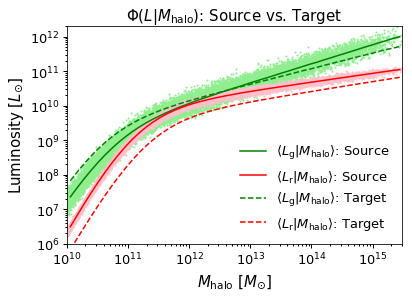

In [10]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

halo_mass_table = np.logspace(10, 16, 100)

nskip=50
__=ax.plot(10**logm_mids, median_gband_source, color='green', 
          label=r'$\langle L_{\rm g} \vert M_{\rm halo} \rangle$: Source')
__=ax.plot(10**logm_mids, median_rband_source, color='red', 
          label=r'$\langle L_{\rm r} \vert M_{\rm halo} \rangle$: Source')

__=ax.plot(10**logm_mids, median_gband_target, '--', color='green', 
          label=r'$\langle L_{\rm g} \vert M_{\rm halo} \rangle$: Target')
__=ax.plot(10**logm_mids, median_rband_target, '--', color='red', 
          label=r'$\langle L_{\rm r} \vert M_{\rm halo} \rangle$: Target')

__=ax.scatter(source_galaxies['host_halo_mass'][::nskip], 
              source_galaxies['luminosity_gband'][::nskip], 
              s=1, color='lightgreen', label='')
__=ax.scatter(source_galaxies['host_halo_mass'][::nskip], 
              source_galaxies['luminosity_rband'][::nskip], 
              s=1, color='pink', label='')

xlim = ax.set_xlim(1e10, 3e15)
ylim = ax.set_ylim(1e6, 2e12)

xlabel = ax.set_xlabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
ylabel = ax.set_ylabel(r'Luminosity $[L_{\odot}]$')
title = ax.set_title(r'$\Phi(L\vert M_{\rm halo})$: Source vs. Target')
legend = ax.legend()
